# Polynomial Regression

## Why limit ourselves to straight lines?
- Not all relationships are linear. For example, the area of a circle is proportional to the square of its radius, not to the radius itself.
- Linear formula: $$y = mx + b$$
    - This is a “first order” or “first degree” polynomial, as the power of x is 1
    - This means that y changes at a constant rate as x changes
- Second order polynomial: $$𝑦 = 𝑎𝑥^2 + 𝑏x + 𝑐$$
    - This is a “second order” or “second degree” polynomial, as the power of x is 2
    - This means that y changes at a variable rate as x changes, depending on the values of a, b, and c
    - For example, if $a > 0$, then y will have a minimum value when $$x = \frac{-b}{2a}$$
- Third order: $$y = 𝑎𝑥^3 + 𝑏𝑥^2 + 𝑐x + 𝑑$$
    - This is a “third order” or “third degree” polynomial, as the power of x is 3
    - This means that y changes at an even more variable rate as x changes, depending on the values of a, b, c, and d
    - For example, if $a > 0$, then y will have either one or three real roots (the values of x that make y equal to zero)
- Higher orders produce more complex curves that can have more peaks and valleys.

## Beware overfitting
- Overfitting is when a model fits the training data too well, but fails to generalize to new data.
- Don’t use more degrees than you need. A higher order polynomial will have more flexibility to fit the data, but it may also capture noise or outliers that are not representative of the true relationship.
- Visualize your data first to see how complex of a curve there might really be. A scatter plot can help you see the overall trend and the distribution of the data points.
- Visualize the fit – is your curve going out of its way to accommodate outliers? A line plot can help you see how well your model fits the data and whether it has any extreme bends or turns.
- A high r-squared simply means your curve fits your training data well; but it may not be a good predictor. R-squared is a measure of how much of the variation in y is explained by x. It ranges from 0 to 1, where 1 means a perfect fit and 0 means no fit. However, a high r-squared does not necessarily mean a good model, as it can be inflated by adding more variables or increasing the order of the polynomial.
- Later we’ll talk about more principled ways to detect overfitting (train/test). One way is to split your data into two sets: one for training the model and one for testing its performance. Then you can compare the r-squared values for both sets and see if there is a significant drop in the test set, which indicates overfitting.


<class 'pandas.core.frame.DataFrame'>
   Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000
<class 'numpy.ndarray'> [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
<class 'numpy.ndarray'> [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
<class 'numpy.ndarray'>
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


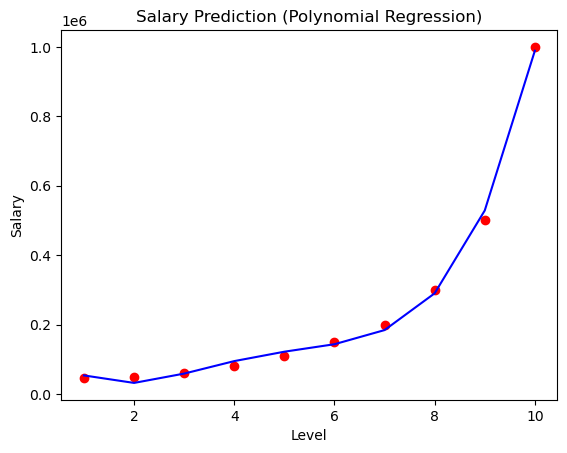

The r-squared value for the model is: 0.9973922891706614


In [1]:
# Importing the libraries
# We need numpy for working with arrays and matrices
# We need pandas for reading and manipulating data
# We need matplotlib for plotting graphs
# We need sklearn for machine learning algorithms and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Importing the dataset
# The dataset contains the level and salary of employees in a company
dataset = pd.read_csv("Salary_Data.csv")
print(type(dataset))
print(dataset)
X = dataset.iloc[:, 0:1].values  # Level column, which is the independent variable
y = dataset.iloc[:, 1].values  # Salary column, which is the dependent variable
print(type(X), X)
print(type(y), y)

# Fitting Polynomial Regression to the dataset
# We want to model the relationship between level and salary using a polynomial function of order 4
poly_regr = PolynomialFeatures(
    degree=4
)  # This creates a polynomial object with degree 4
X_poly = poly_regr.fit_transform(
    X
)  # This transforms the level values to the polynomial form, such as x, x^2, x^3, x^4
print(type(X_poly))
print(X_poly)

lin_reg_2 = (
    LinearRegression()
)  # This creates a linear regression object, which can fit any linear model
lin_reg_2.fit(
    X_poly, y
)  # This fits the linear regression object to the polynomial features and the salary values

# Visualising the Polynomial Regression results
plt.scatter(
    X, y, color="red"
)  # This plots the data points as red dots on a scatter plot
plt.plot(
    X, lin_reg_2.predict(X_poly), color="blue"
)  # This plots the regression curve as a blue line on the same plot
plt.title(
    "Salary Prediction (Polynomial Regression)"
)  # This sets the title of the plot as "Salary Prediction (Polynomial Regression)"
plt.xlabel("Level")  # This sets the label of the x-axis as "Level"
plt.ylabel("Salary")  # This sets the label of the y-axis as "Salary"
plt.show()  # This displays the plot on the screen

# Calculating the r-squared value for the model
# The r-squared value is a measure of how well the model fits the data. It ranges from 0 to 1, where 1 means perfect fit and 0 means no fit.
y_pred = lin_reg_2.predict(
    X_poly
)  # This predicts the salary for each level using the fitted model
r2 = r2_score(
    y, y_pred
)  # This calculates the r-squared value by comparing the actual salary and the predicted salary
print(
    "The r-squared value for the model is:", r2
)  # This prints the r-squared value on the screen

[-3.03208795e-02  1.34333191e+00 -1.55383039e+01  1.13768037e+02]
[ 1.          1.21212121  1.42424242  1.63636364  1.84848485  2.06060606
  2.27272727  2.48484848  2.6969697   2.90909091  3.12121212  3.33333333
  3.54545455  3.75757576  3.96969697  4.18181818  4.39393939  4.60606061
  4.81818182  5.03030303  5.24242424  5.45454545  5.66666667  5.87878788
  6.09090909  6.3030303   6.51515152  6.72727273  6.93939394  7.15151515
  7.36363636  7.57575758  7.78787879  8.          8.21212121  8.42424242
  8.63636364  8.84848485  9.06060606  9.27272727  9.48484848  9.6969697
  9.90909091 10.12121212 10.33333333 10.54545455 10.75757576 10.96969697
 11.18181818 11.39393939 11.60606061 11.81818182 12.03030303 12.24242424
 12.45454545 12.66666667 12.87878788 13.09090909 13.3030303  13.51515152
 13.72727273 13.93939394 14.15151515 14.36363636 14.57575758 14.78787879
 15.         15.21212121 15.42424242 15.63636364 15.84848485 16.06060606
 16.27272727 16.48484848 16.6969697  16.90909091 17.1212121

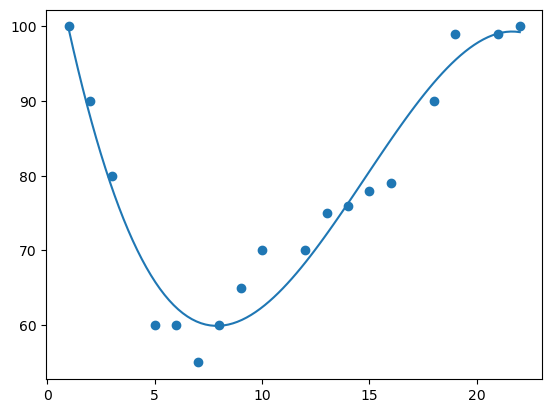

0.9432150416451027


In [11]:
# Import numpy and matplotlib libraries
# numpy is a library for scientific computing in Python
# matplotlib is a library for creating plots and graphs in Python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# we have registered 18 cars as they were passing a certain tollbooth.
# We have registered the car's speed, and the time of day (hour) the passing occurred.
# The x-axis represents the hours of the day and the y-axis represents the speed:
x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

# Fit a polynomial of degree 3 to the data points using numpy.polyfit function
# numpy.polyfit returns the coefficients of the polynomial that minimizes the squared error between the data points and the polynomial
# The coefficients are stored in a numpy array called coefficients
coefficients = np.polyfit(x, y, 3)
print(coefficients)

# Create a polynomial object from the coefficients using numpy.poly1d function
# numpy.poly1d returns a polynomial object that can be evaluated at any x value using the syntax mymodel(x)
# The polynomial object is stored in a variable called mymodel
mymodel = np.poly1d(coefficients)

# Create a line space from 1 to 22 with 100 equally spaced points using numpy.linspace function
# numpy.linspace returns a numpy array of numbers that are evenly distributed over a specified interval
# The line space is stored in a variable called myline
myline = np.linspace(1, 22, 100)
print(myline)

# Plot the data points as scatter plot using matplotlib.pyplot.scatter function
# matplotlib.pyplot.scatter takes two arguments: the x and y values of the data points
# The scatter plot shows the distribution of the data points in a two-dimensional plane
plt.scatter(x, y)

# Plot the fitted polynomial as a line plot using matplotlib.pyplot.plot function
# matplotlib.pyplot.plot takes two arguments: the x and y values of the line plot
# The line plot shows the shape of the polynomial that fits the data points
plt.plot(myline, mymodel(myline))

# Show the plot using matplotlib.pyplot.show function
# matplotlib.pyplot.show displays the plot on the screen or saves it to a file depending on the configuration
plt.show()

print(r2_score(y, mymodel(x)))